In [1]:
import numpy as np
import json

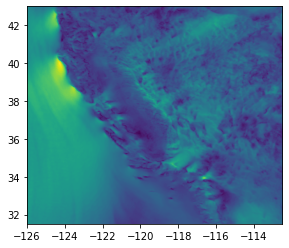

<AxesSubplot:>

In [2]:
import rasterio
from rasterio.plot import show
fp = 'California-Weather-WindSpeed-2021-0715-03000m.tif'
img = rasterio.open(fp)
show(img)

In [3]:
print(img.crs)

EPSG:4326


In [4]:
affine = img.transform
affine

Affine(0.03, 0.0, -126.0,
       0.0, -0.03, 43.0)

In [5]:
imarray = img.read(1)

In [8]:
# from pyproj import Transformer
# transformer = Transformer.from_crs("epsg:32610", "epsg:4326")#Change to 32610 which is the salo epsg
# transformer.transform(648490.0, 4377880.0)

(39.53775311661699, -121.27206566921241)

In [6]:
len(imarray), len(imarray[0])

(383, 450)

In [7]:
origin = affine * (0, 0)
end = affine * (len(imarray[0]), len(imarray))
origin, end

((-126.0, 43.0), (-112.5, 31.509999999999998))

In [8]:
img.bounds

BoundingBox(left=-126.0, bottom=31.509999999999998, right=-112.5, top=43.0)

In [12]:
# ori_lat_long_coords = transformer.transform(origin[0], origin[1])
# end_lat_long_coords = transformer.transform(end[0], end[1])
# ori_lat_long_coords, end_lat_long_coords

((37.48908544352257, -122.20127766290896),
 (36.888272429602885, -121.21243727715039))

In [10]:
d = {}
i = 0
while i < len(imarray):
    j = 0
    epsg_coords = affine * (j, i)
    latitude = epsg_coords[1]
    while j < len(imarray[0]):
        epsg_coords = affine * (j, i)
        longitude = epsg_coords[0]
        d[str(latitude) + ", " + str(longitude)] = imarray[i][j]
        j += 1
    i += 1
    if i % (len(imarray) // 100) == 0:
        print(str(int((i+1) / len(imarray) * 100)) + "%")

1%
1%
2%
3%
4%
4%
5%
6%
7%
8%
8%
9%
10%
11%
12%
12%
13%
14%
15%
15%
16%
17%
18%
19%
19%
20%
21%
22%
22%
23%
24%
25%
26%
26%
27%
28%
29%
30%
30%
31%
32%
33%
33%
34%
35%
36%
37%
37%
38%
39%
40%
40%
41%
42%
43%
44%
44%
45%
46%
47%
48%
48%
49%
50%
51%
51%
52%
53%
54%
55%
55%
56%
57%
58%
59%
59%
60%
61%
62%
62%
63%
64%
65%
66%
66%
67%
68%
69%
69%
70%
71%
72%
73%
73%
74%
75%
76%
77%
77%
78%
79%
80%
80%
81%
82%
83%
84%
84%
85%
86%
87%
87%
88%
89%
90%
91%
91%
92%
93%
94%
95%
95%
96%
97%
98%
98%
99%


In [ ]:
# d = {}
# i = 0
# while i < int(len(imarray) / 2):
#     j = 0
#     epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#     lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#     latitude = lat_long_coords[0]
# #     latitude = topmost - i * 2 * delta_lat - 0.5 * delta_lat
#     row1 = imarray[2 * i]
#     row2 = imarray[2 * i + 1]
    
#     while j < int(len(imarray[0]) / 2):
#         epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#         lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#         longitude = lat_long_coords[1]
# #         longitude = leftmost + j * 2 * delta_long + 0.5 * delta_long
#         d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row1[2 * j + 1] + row2[2 * j] + row2[2 * j + 1]) / 4
#         j += 1
#     if j < len(imarray[0]) / 2:
#         epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#         lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#         longitude = lat_long_coords[1]
#         d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row2[2 * j]) / 2
#     i += 1
#     if i % (len(imarray) // 100) == 0:
#         print(str(int(i / len(imarray) * 200)) + "%")
# if i < len(imarray) / 2:
#     j = 0
#     epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#     lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#     latitude = lat_long_coords[0]
#     while j < int(len(imarray[0]) / 2):
#         epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#         lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#         longitude = lat_long_coords[1]
#         d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row1[2 * j + 1] + row2[2 * j] + row2[2 * j + 1]) / 4
#         j += 1
#     if j < len(imarray[0]) / 2:
#         epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#         lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#         longitude = lat_long_coords[1]
#         d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row2[2 * j]) / 2

In [11]:
len(d.keys())

172350

In [12]:
d_key_list = list(d.keys())

In [15]:
d_key_list[86000]

'37.27, -124.5'

In [16]:
rightmost = -150
leftmost = -100
topmost = 20
bottommost = 80

In [17]:
for coord in d_key_list:
    lat = float(coord.split(", ")[0])
    long = float(coord.split(", ")[1])
    if long < leftmost:
        leftmost = long
    if long > rightmost:
        rightmost = long
    if lat > topmost:
        topmost = lat
    if lat < bottommost:
        bottommost = lat

In [18]:
rightmost, leftmost, topmost, bottommost

(-112.53, -126.0, 43.0, 31.54)

In [19]:
d[d_key_list[86000]]

20.714285

In [20]:
import pickle
pickle_out = open("CaliforniaWindlLongLat.pickle", "wb")
pickle.dump(d, pickle_out)
pickle_out.close()

In [ ]:
d_key_list[0]

In [ ]:
d[d_key_list[0]]